In [2]:
%load_ext watermark
%watermark -a JaeEunPark -u -d -p numpy,pandas,matplotlib,sklearn

JaeEunPark 
last updated: 2019-08-03 

numpy 1.16.2
pandas 0.24.2
matplotlib 3.0.3
sklearn 0.20.3


In [1]:
import pandas as pd
from io import StringIO

csv_data = \
''' A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

In [2]:
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [3]:
df.isnull()

,A,B,C,D
0,False,False,False,False
1,False,False,True,False
2,False,False,False,True


In [4]:
df.isna()

,A,B,C,D
0,False,False,False,False
1,False,False,True,False
2,False,False,False,True


In [5]:
df.isnull().sum()

 A    0
B     0
C     1
D     1
dtype: int64

In [6]:
# numpy 배열로 변환 
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [7]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [8]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [9]:
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [10]:
df.dropna(how='any')

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [11]:
# 값이 4개보다 작은 행들을 삭제 
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [12]:
# 특정 열에 NaN이 있는 행만 삭제
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 A    3 non-null float64
B     3 non-null float64
C     2 non-null float64
D     2 non-null float64
dtypes: float64(4)
memory usage: 176.0 bytes


In [14]:
# 누락된 값을 열의 평균으로 대체 하는 방법
# sklearn.preprocessing의 Imputer 사용
from sklearn.preprocessing import Imputer

In [15]:
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

C:\Anaconda\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [16]:
import numpy as np
from sklearn.impute import SimpleImputer

In [17]:
# strategy로는 mean, median, most_frequent가 사용될 수 있다.
# strategy = 'constant' 추가 -> fill_value로 채우는 값을 지정할 수 있다. =
simr = SimpleImputer(missing_values=np.nan, strategy='mean')
simr = simr.fit(df.values) # X에 imputer fit
# print(type(df.values))
imputed_Data = simr.transform(df.values) # missing value 채우기
imputed_Data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [18]:
# 행 값들로 strategy해서 채우고 싶을 때에는 FunctionTransformer 사용
from sklearn.preprocessing import FunctionTransformer
ftr_simr = FunctionTransformer(lambda X: simr.fit_transform(X.T).T, validate=False)
imputed_data = ftr_simr.fit_transform(df.values)
imputed_data

array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  6.33333333,  8.        ],
       [10.        , 11.        , 12.        , 11.        ]])

In [19]:
import pandas as pd

In [20]:
df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                  ['red', 'L', 13.5, 'class2'],
                  ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [21]:
size_mapping={'XL':3, 'L':2, 'M':1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [22]:
# 다시 원래대로 매핑
inv_size_mapping = {v:k for k,v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [23]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [24]:
# 클래스 레이블 인코딩 str->int
import numpy as np

class_mapping = {label: idx for idx, label in
                enumerate(np.unique(df['classlabel']))}

In [25]:
class_mapping

{'class1': 0, 'class2': 1}

In [26]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [27]:
inv_class_mapping = {v:k for k,v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping_mapping)

NameError: name 'inv_class_mapping_mapping' is not defined

In [33]:
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [34]:
# sklearn.preprocessing의 LabelEncoder를 이용하여 편하게 할 수 있다
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()

In [35]:
# array-like이므로 .values로 ndarray로 변환해줌
y = class_le.fit_transform(df['classlabel'].values)

In [36]:
y

array([0, 1, 0], dtype=int64)

In [37]:
# 거꾸로 매핑
class_le.inverse_transform(y)

array([0, 1, 0], dtype=int64)

In [38]:
# 순서가 없는 특성에 원-핫 인코딩 적용
X = df[['color', 'size', 'price']].values

color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [39]:
# sklearn.compose 의 ColumnTransformer
# sklearn.preprocessing 의 OrdinalEncoder를 이용해서
# 여러개의 열을 한 번에 바꿀 수 있다.
# OrdinalEncoder는 순서가 없는 범주형 특성을 정수로 변환하는 클래스이다. 이름에 속지 말자!
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [40]:
oe = OrdinalEncoder(dtype=np.int)
ct = ColumnTransformer([('oe', oe, ['color'])])
X_trans = ct.fit_transform(df)
X_trans

array([[1],
       [2],
       [0]])

In [41]:
ct.named_transformers_['oe'].inverse_transform(X_trans)

array([['green'],
       ['red'],
       ['blue']], dtype=object)

In [42]:
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [43]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0]) # 0번 컬럼 변경
ohe.fit_transform(X).toarray()

C:\Anaconda\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [44]:
oh_enc = OneHotEncoder(categories='auto')
col_trans = ColumnTransformer([('oh_enc', oh_enc, [0])], remainder='passthrough')
col_trans.fit_transform(X)

array([[0.0, 1.0, 0.0, 1, 10.1],
       [0.0, 0.0, 1.0, 2, 13.5],
       [1.0, 0.0, 0.0, 3, 15.3]], dtype=object)

In [45]:
# sparse를 Fals로 설정하면 밀집 배열을 얻을 수 있다.
# sparse -> 희소 행렬
ohe = OneHotEncoder(categorical_features=[0], sparse=False)
ohe.fit_transform(X)

C:\Anaconda\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [46]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [47]:
pd.get_dummies(df[['price', 'color', 'size']],columns=['color'])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [48]:
pd.get_dummies(df[['price', 'color', 'size']], columns=['size'])

,price,color,size_1,size_2,size_3
0,10.1,green,1,0,0
1,13.5,red,0,1,0
2,15.3,blue,0,0,1


다중 공선성 문제를 피하려면 drop_first를 설정한다.
- color_blue가 없어도 green=0, red=0이면 blue인걸 알 수 있다.

In [49]:
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [50]:
# 원핫인코더에서 피하기 
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()[:,1:]

C:\Anaconda\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

In [51]:
wine = pd.read_csv('https://archive.ics.uci.edu/'
                  'ml/machine-learning-databases/wine/wine.data', header=None)

In [52]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
0     178 non-null int64
1     178 non-null float64
2     178 non-null float64
3     178 non-null float64
4     178 non-null float64
5     178 non-null int64
6     178 non-null float64
7     178 non-null float64
8     178 non-null float64
9     178 non-null float64
10    178 non-null float64
11    178 non-null float64
12    178 non-null float64
13    178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [53]:
wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

In [54]:
print('클래스 레이블', np.unique(wine['Class label']))

클래스 레이블 [1 2 3]


In [55]:
wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = \
train_test_split(wine.iloc[:,1:], wine.iloc[:,0], test_size=0.3, random_state=0, stratify=wine.iloc[:,0])

스케일 맞추기
- 정규화(normalization)
- 표준화(standardization)

정규화 0~1

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
mms = MinMaxScaler()
# 주의! - 학습은 1번만! 학습하여 얻은 파라미터로  test데이터 변환시킨다.
# 왜지?
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

C:\Anaconda\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [60]:
X_train_norm, X_test_norm

(array([[0.64619883, 0.83201581, 0.4248366 , ..., 0.45744681, 0.28571429,
         0.19400856],
        [0.6871345 , 0.15612648, 0.65359477, ..., 0.81914894, 0.63369963,
         0.68259629],
        [0.67836257, 0.15019763, 0.65359477, ..., 0.75531915, 0.52747253,
         0.71825963],
        ...,
        [0.72222222, 0.84980237, 0.34640523, ..., 0.10638298, 0.02197802,
         0.09771755],
        [0.16081871, 0.06916996, 0.39215686, ..., 0.54255319, 0.68131868,
         0.43366619],
        [0.37719298, 0.61857708, 0.45751634, ..., 0.75531915, 0.68131868,
         0.13195435]]),
 array([[ 0.69005848,  0.22924901,  0.64052288,  0.30645161,  0.55555556,
          0.69655172,  0.51687764,  0.52      ,  0.39873418,  0.40497336,
          0.69148936,  0.60805861,  0.78245364],
        [ 0.22222222,  0.14031621,  0.54248366,  0.40860215,  0.41975309,
          0.3137931 ,  0.29746835,  0.64      ,  0.19303797,  0.10746004,
          1.03191489,  0.35164835,  0.05492154],
        [ 0.871

표준화 -> 정규분포

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

C:\Anaconda\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
ex = np.array([0,1,2,3,4,5])

print('표준화 :',(ex - ex.mean()) / (ex.std()))

print('정규화 :',(ex - ex.min()) / (ex.max() - ex.min()))

표준화 : [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
정규화 : [0.  0.2 0.4 0.6 0.8 1. ]


In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
lr = LogisticRegression(solver='liblinear',
                        multi_class='auto',
                        penalty='l1', C=1.0,
                       random_state=42)

lr.fit(X_train_std, y_train)
print('훈련 정확도:',lr.score(X_train_std, y_train))
print('테스트 정확도:', lr.score(X_test_std, y_test))

훈련 정확도: 1.0
테스트 정확도: 1.0


In [66]:
lr.intercept_ # 절편들

array([-1.26356604, -1.21599454, -2.37043523])

In [67]:
np.set_printoptions(8)

In [68]:
lr.coef_[lr.coef_!=0].shape

(23,)

In [69]:
lr.coef_ # 가중치들

array([[ 1.24571379,  0.18047746,  0.74447184, -1.16206611,  0.        ,
         0.        ,  1.16544663,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55203518,  2.50981212],
       [-1.53722618, -0.38723608, -0.99490375,  0.36490375, -0.05976457,
         0.        ,  0.66773248,  0.        ,  0.        , -1.9341522 ,
         1.23402387,  0.        , -2.23179839],
       [ 0.13508255,  0.16979104,  0.35787068,  0.        ,  0.        ,
         0.        , -2.43274437,  0.        ,  0.        ,  1.56234781,
        -0.81813588, -0.49713467,  0.        ]])

In [70]:
%matplotlib inline

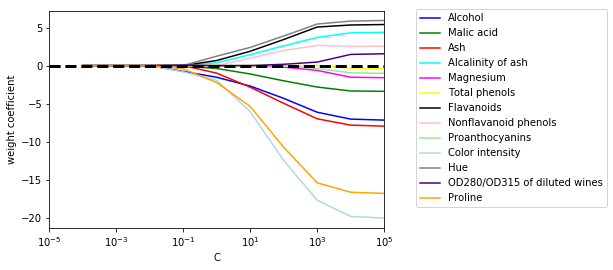

In [71]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(solver='liblinear', multi_class='auto',
                            penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

### Sequence Backward Selection(SBS)

계산 효율성을 향상하기 위해 모델 성능을 가능한 적게 희생하면서 초기 특성의 부분 공간으로 차원을 축소한다.
> 각 단계에서 제거했을 때 성능 손실이 최대가 되는 특성을 제거

In [72]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [73]:
class SBS:
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test =\
        train_test_split(X, y, test_size=self.test_size,
                        random_state=self.random_state)
        
        dim = X_train.shape[1] # feature 수
        self.indices_ = tuple(range(dim)) # 그때 그때의 특성 구성
        self.subsets_ = [self.indices_] # 특성 변화 저장
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, 
                                 self.indices_) # 성능 측정
        self.scores_ = [score] # score 변화 저장
        
        # 반복하면서 원하는 크기의 특성까지 줄여가는 반복문
        while dim > self.k_features:
            scores = []
            subsets = []
            
            # 반복하면서 모든 조합의 특성의 성능 측정
            for p in combinations(self.indices_, r=dim-1): # 모든 1개 특성을 제외하는 모든 조합
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
        
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        
        return self
        
    def transform(self, X):
        return X[:, self.indices_] # 원하는 모양으로 변형(특성 축소)
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        # 원하는 feature들로 학습
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:,indices])
        score = self.scoring(y_test, y_pred) # 성능 측정
        return score
        

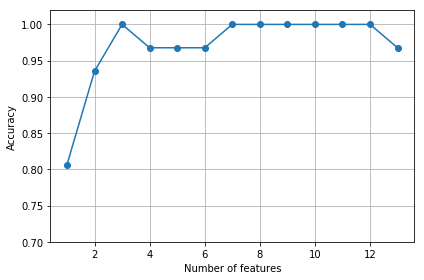

In [74]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# 특성 조합의 성능 그래프를 출력
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7,1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

높은 검증 세트 성능을 내는 특성 확인

In [75]:
k3 = list(sbs.subsets_[10])
print(k3)
print(wine.columns[1:][k3])

[0, 1, 11]
Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [76]:
# 원래 성능 확인
knn.fit(X_train_std, y_train)
print('훈련 정확도', knn.score(X_train_std, y_train))
print('테스트 정확도', knn.score(X_test_std, y_test))

훈련 정확도 0.967741935483871
테스트 정확도 0.9629629629629629


In [77]:
# 3개 특성 사용했을 때의 성능 측정
# -> 큰 차이가 나지 않는다!
knn.fit(X_train_std[:, k3], y_train)
print('훈련 정확도', knn.score(X_train_std[:,k3], y_train))
print('테스트 정확도', knn.score(X_test_std[:,k3], y_test))

훈련 정확도 0.9516129032258065
테스트 정확도 0.9259259259259259


In [78]:
from sklearn.ensemble import RandomForestClassifier

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


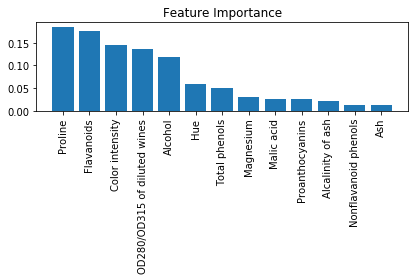

In [84]:
feat_labels = wine.columns[1:]#?

forest = RandomForestClassifier(n_estimators=500, random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_ # 특성별 중요도

#값으로 sort해서 인덱스값들 반환
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" %(f+1, 30,
                           feat_labels[indices[f]],
                           importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
       importances[indices],
       align='center')

plt.xticks(range(X_train.shape[1]),
          feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [85]:
from sklearn.feature_selection import SelectFromModel

In [90]:
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
# prefit 설정 - fit하지 않고 바로 transform을 사용할지 설정 여부
#threshold - 임계 값. 이 값을 넘는 특성들을 가져오겠다.
X_selected = sfm.transform(X_train)
# [n_samples, n_selected_features]
# print(X_selected.shape)
print('이 임계 조건을 만족하는 샘플의 수 :', X_selected.shape[1])

이 임계 조건을 만족하는 샘플의 수 : 5


In [91]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
